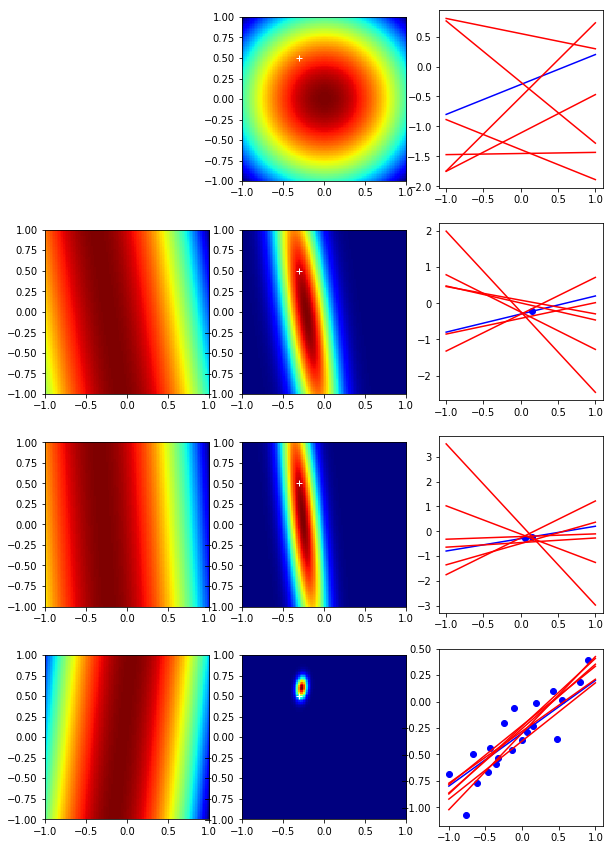

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as LA
from scipy.stats import multivariate_normal
import scipy.stats as st
import matplotlib.pyplot as plt

def h(w0, w1, x, noise = 0):    
    return w0 + w1 * x + noise * np.random.normal(size = len(x));

def phi(x, W):
    return W[0] + W[1] * x;

def calc_design_matrix(X):
    Phi = np.ones((len(X), 2))
    Phi[:, 1] = X
    return Phi

def calc_likelihood(m, X, T, tau_e):
    N = len(X)
    v = np.zeros((m.shape[0],m.shape[1]))
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            s = 0
            for k in range(N):
                s += (phi(X[k],m[i,j]) - T[k])**2
            v[i,j] = 1/(2*np.pi*tau_e)**N/2 * np.exp(-1/(2*tau_e) * s)
    return v

def calc_posterior(prior, tau_e, X, T):
    Phi = calc_design_matrix(X)
    S_N = LA.inv(LA.inv(prior.cov) + tau_e * Phi.T.dot(Phi))
    m_N = tau_e * S_N.dot(Phi.T.dot(T))
    
    return multivariate_normal(m_N, S_N)

def plot_functions(dist):
    w = np.random.multivariate_normal(dist.mean, dist.cov, 6)
    plt.plot(Z, h(a0, a1, Z), color = 'blue')
    for i in range(6):
        plt.plot(Z, h(w[i,0], w[i,1], Z), color = 'red')  

plt.figure(figsize=(10,15))

P = 100
Z = np.linspace(-1,1,P)
x, y = np.meshgrid(Z,Z)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

tau_0 = 2
tau_e = (1/0.2)**2
m_0 = [0, 0]
S_0 = tau_0 * np.identity(2)
a0 = -0.3
a1 = 0.5

chkpnts = [0,1,2,20]

X = np.random.uniform(-1, 1, size = 20)
T = h(a0, a1, X, 0.2)

prior0 =  multivariate_normal(m_0,S_0)
posteriors = [calc_posterior(prior0, tau_e, X[:i], T[:i]) for i in chkpnts[1:]]
posteriors.insert(0, prior0)

N = len(chkpnts)
e = [-1,1,-1,1]
for i in range(N):
    n = chkpnts[i]
    if(i>0):
        plt.subplot(N, 3, 3*i + 1)
        prior = posteriors[i-1]
        likelihood = calc_likelihood(pos, X[n-1:n], T[n-1:n], tau_e)
        plt.imshow(likelihood, cmap='jet', origin='lower', extent=e)
    plt.subplot(N, 3, 3*i + 2)
    plt.plot(a0, a1, '+', color = 'white')
    plt.imshow(posteriors[i].pdf(pos), cmap='jet', origin='lower', extent=e)
    plt.subplot(N, 3, 3*i + 3)
    plot_functions(posteriors[i])
    plt.scatter(X[:n], T[:n], marker = 'o', color = 'blue')

plt.show()